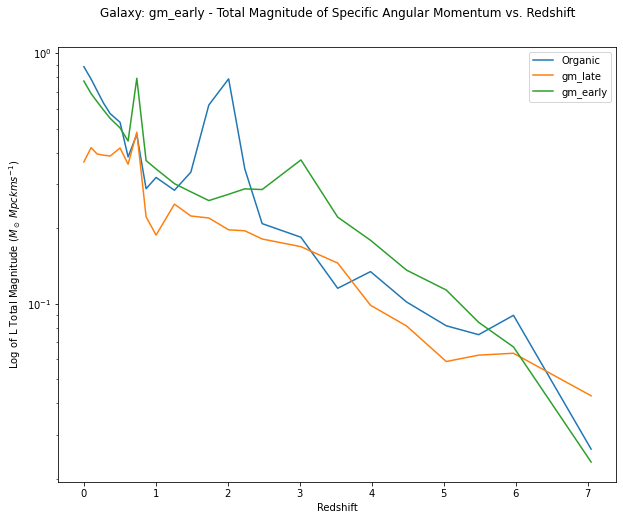

In [4]:
import h5py
import matplotlib.pyplot as plt
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
import numpy as np
import re

axisScale = 0.03

datasets = ['organic', 'gm_late', 'gm_early']
datasetNo = -1

galaxyAm = np.array(range(144), dtype=float).reshape(3, 24, 2)
    
for dataset in datasets:
    #print('-----------------------------------------')
    #print(dataset)
    #print('-----------------------------------------')
    
    files = listdir('data/' + dataset)


    count = 0
    datasetNo = datasetNo + 1

    
    for file in files:
        
        # get redshift from the filename
        m = re.search('(z[0-9])\w+', file)
        s = m.group(0).replace('z', '')
        s = s.replace('p', '.')
        
        redshift = float(s)
        
        # load data for a particular galaxy at a particular redshift
        f = h5py.File('data/' + dataset + '/' + file,'r')

        ds_c = f['Coordinates']
        ds_v = f['Velocity']
        ds_m = f['Mass']
        
        r = np.cross(ds_c, ds_v)
        r1 = np.transpose(np.multiply(ds_m, np.transpose(r)))
        r2 = r1 / np.sum(ds_m)
        specAngMomTot = np.linalg.norm(r2, axis=1)

        # Store totals of all particles for each redshift in the current galaxy
        galaxyAm[datasetNo, count, 0] = redshift
        galaxyAm[datasetNo, count, 1] = np.sum(specAngMomTot)
            
        count = count + 1
        

# print each angular momentum component's total per redshift
#for n in range(24):
#    print('Galaxy "' + str(dataset) + '" redshift: ' + str('{:<05}'.format(galaxyAm[datasetNo, n, 0])) + '\t total: ' + str(galaxyAm[datasetNo, n, 1]) )

    
plt.plot(galaxyAm[0, 0:, 0], galaxyAm[0, 0:, 1], label='Organic')
plt.plot(galaxyAm[1, 0:, 0], galaxyAm[1, 0:, 1], label='gm_late')
plt.plot(galaxyAm[2, 0:, 0], galaxyAm[2, 0:, 1], label='gm_early')
plt.rcParams["figure.figsize"] = (10, 8)
plt.title('Galaxy: ' + dataset + ' - Total Magnitude of Specific Angular Momentum vs. Redshift', pad=30)
plt.xlabel('Redshift')
plt.ylabel(r'Log of L Total Magnitude ($M_\odot\ Mpc km s^{-1})$')
plt.ticklabel_format(axis='y', style='sci', useMathText=True)
plt.semilogy()
plt.legend()
plt.show()    